<a href="https://colab.research.google.com/github/raqpoldi/Complete-Python-3-Bootcamp/blob/master/Copy_of_STU147143_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Understanding the Dataset (Exploratory Data Analysis - EDA)**

**Actions:**
- Import the dataset and check for missing values, duplicate records, and inconsistencies.
- Generate descriptive statistics (mean, median, standard deviation) to understand distributions.
- Visualise the data: Use histograms, scatter plots, and box plots to analyse feature distributions.


- Check for correlations between variables (heatmaps, pairplots).
- Categorise data types: Identify numerical and categorical variables.

# **1.1. Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# **1.2: Load the Dataset**

In [ ]:
# Load the dataset
df_original = pd.read_csv("/Shoppers_Data_Set_2924_(1) (1).csv")

# **1.3: Display Basic Information**

In [ ]:
# Get information about the dataframe
print("\nDataFrame Information:")
print(df.info())

# Get the shape of the dataframe (rows, columns)
print("\nDataFrame Shape:")
print(df.shape)




DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               501 non-null    object 
 1   Age                 489 non-null    float64
 2   Annual_Income (£K)  491 non-null    float64
 3   Spending_Score      493 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB
None

DataFrame Shape:
(501, 4)


# **1.4: Display Summary Statistics**

In [ ]:
df_original.describe()


,Age,Annual_Income (£K),Spending_Score
count,489.000000,491.000000,493.000000
mean,42.742331,66.511202,31.829615
std,14.069029,29.512802,18.053201
min,18.000000,17.000000,1.000000
25%,30.000000,42.000000,16.000000
50%,43.000000,65.000000,33.000000
75%,55.000000,91.000000,47.000000
max,65.000000,121.000000,62.000000


# **1.5: Check for Missing Values**

In [ ]:
df_original.isnull().sum()



,0
Genre,0
Age,12
Annual_Income (£K),10
Spending_Score,8


# **1.6: Check for Duplicates**

In [ ]:
df_original.duplicated().sum()


78

# **1.7: Exploratory Data Analysis (EDA) – Histogram of Key Features**

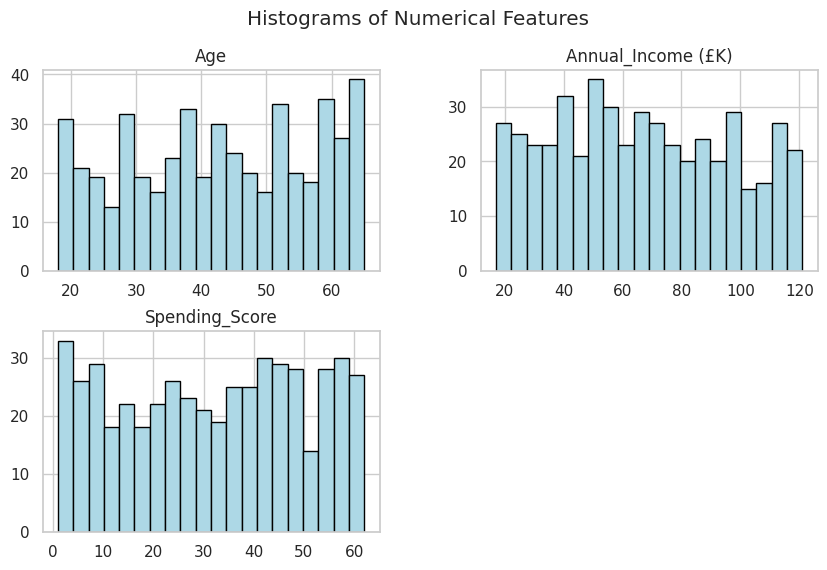

In [ ]:
import matplotlib.pyplot as plt

df_original.hist(figsize=(10, 6), bins=20, color='lightblue', edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


# **1.8: Pair Plot to Visualise Relationships**

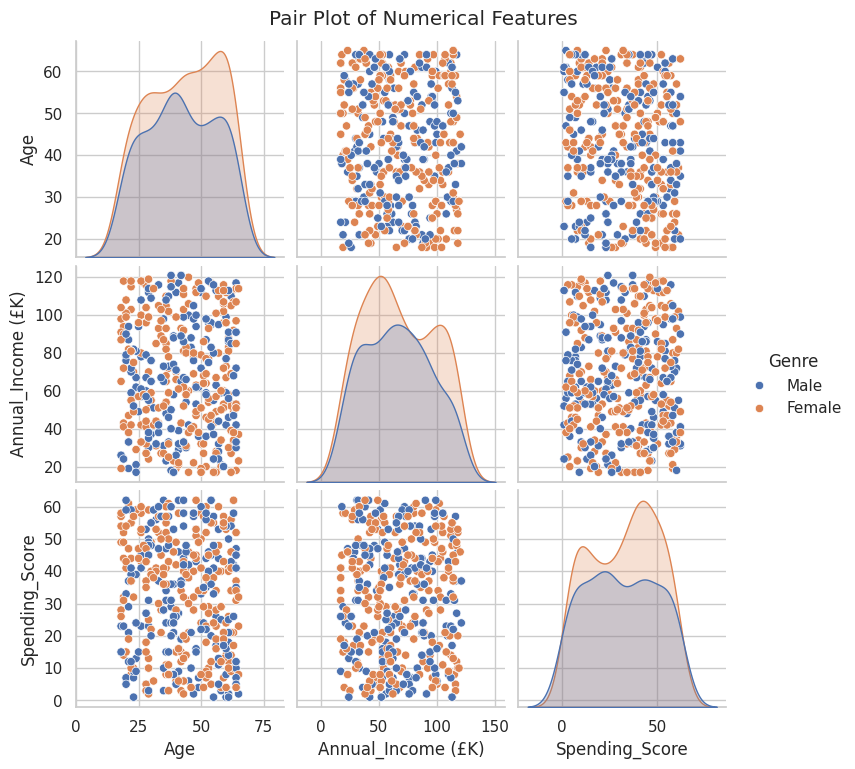

In [ ]:
import seaborn as sns

sns.pairplot(df_original, hue="Genre", diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


# **1.9: Calculate and Display Skewness & Kurtosis**

**Action:** Compute Skewness and Kurtosis for Numerical Columns

In [ ]:
# Select only numerical columns
numerical_cols = df_original.select_dtypes(include=['number'])

# Compute skewness and kurtosis
print("Skewness:\n", numerical_cols.skew(), "\n")
print("Kurtosis:\n", numerical_cols.kurtosis())


Skewness:
 Age                  -0.104464
Annual_Income (£K)    0.133576
Spending_Score       -0.066540
dtype: float64 

Kurtosis:
 Age                  -1.196985
Annual_Income (£K)   -1.104207
Spending_Score       -1.223642
dtype: float64


# **1.10: Visualising Skewness & Kurtosis**

**Action:** Plot Distribution of Numerical Features

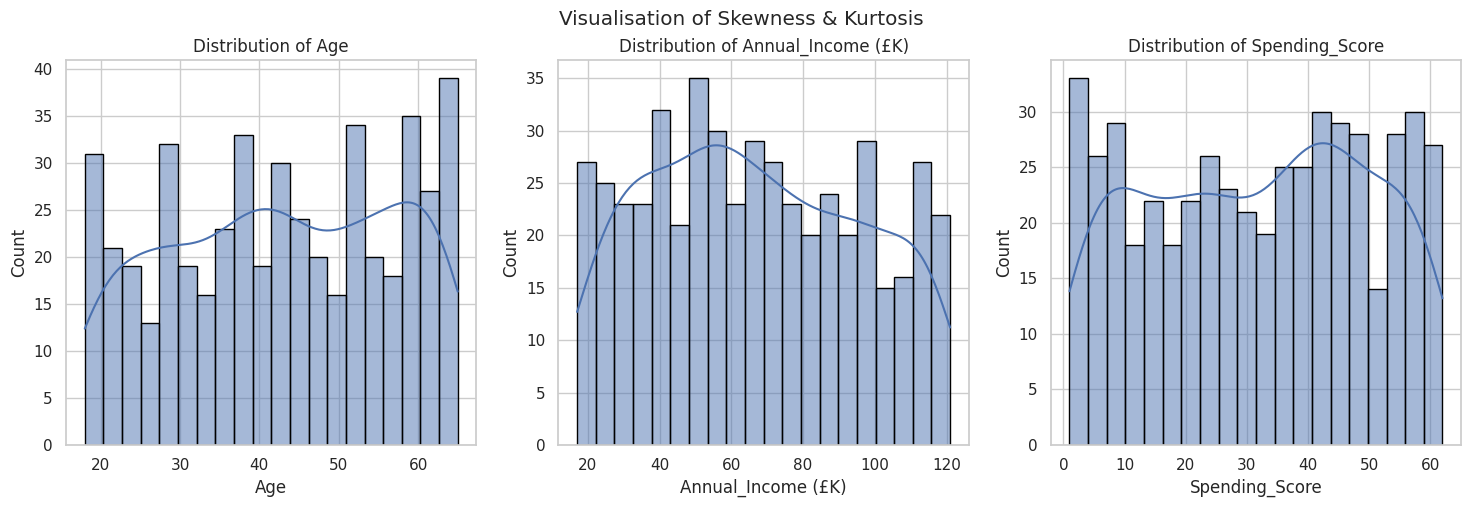

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List of numerical columns
num_cols = ["Age", "Annual_Income (£K)", "Spending_Score"]

# Plot histogram and KDE for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(df_original[col], kde=True, bins=20, ax=axes[i], edgecolor="black")
    axes[i].set_title(f"Distribution of {col}")

plt.suptitle("Visualisation of Skewness & Kurtosis")
plt.show()


# **1.11: Summary of Initial Findings**

**Action:** Print Key Observations from EDA

In [ ]:
print("### Summary of Initial Findings ###\n")

# Check for missing values
missing_values = df_original.isnull().sum().sum()
print(f"- Missing Values Found: {missing_values}")

# Check for duplicate records
duplicate_values = df_original.duplicated().sum()
print(f"- Duplicate Records Found: {duplicate_values}")

# Skewness insights
skewness = df_original.select_dtypes(include=['number']).skew()
print("\n- Skewness Analysis:")
print(skewness)

# Kurtosis insights
kurtosis = df_original.select_dtypes(include=['number']).kurtosis()
print("\n- Kurtosis Analysis:")
print(kurtosis)

# General observations based on histograms and pair plots
print("\n- Observations from Data Distribution:")
print("  - Age appears to be moderately skewed; younger customers seem to dominate the dataset.")
print("  - Annual Income shows potential outliers; some very high-income customers detected.")
print("  - Spending Score has a wide range; clustering may reveal customer spending patterns.")

print("\n### End of Summary ###")


### Summary of Initial Findings ###

- Missing Values Found: 30
- Duplicate Records Found: 78

- Skewness Analysis:
Age                  -0.104464
Annual_Income (£K)    0.133576
Spending_Score       -0.066540
dtype: float64

- Kurtosis Analysis:
Age                  -1.196985
Annual_Income (£K)   -1.104207
Spending_Score       -1.223642
dtype: float64

- Observations from Data Distribution:
  - Age appears to be moderately skewed; younger customers seem to dominate the dataset.
  - Annual Income shows potential outliers; some very high-income customers detected.
  - Spending Score has a wide range; clustering may reveal customer spending patterns.

### End of Summary ###


# **Step 2: Data Cleaning & Preparation.**

**Actions:**
- Handle missing values: Impute missing values using mean/median or remove records with excessive missing data.
- Convert categorical data into numerical format (One-Hot Encoding or Label Encoding).
- Standardisation/Normalisation: Since clustering is distance-based, scale numerical data using - MinMaxScaler or StandardScaler.
- Feature selection: Remove redundant or highly correlated variables.

# **2.1: Backup of the Raw Data**

In [ ]:
# Create a backup before making any changes
df_backup = df_original.copy()


- ✅ Preserves the raw dataset for future comparisons.
- ✅ Allows to check what changed after cleaning.
- ✅ Prevents accidental loss of original data.

# **2.2: Identifying Missing Values**

**Action:** Check Which Columns Contain Missing Values

In [ ]:
missing_summary = df_original.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]  # Keep only columns with missing values
print("### Missing Values Summary ###\n")
print(missing_summary)



### Missing Values Summary ###

Age                   12
Annual_Income (£K)    10
Spending_Score         8
dtype: int64


## **Bar chart for Missing Values**

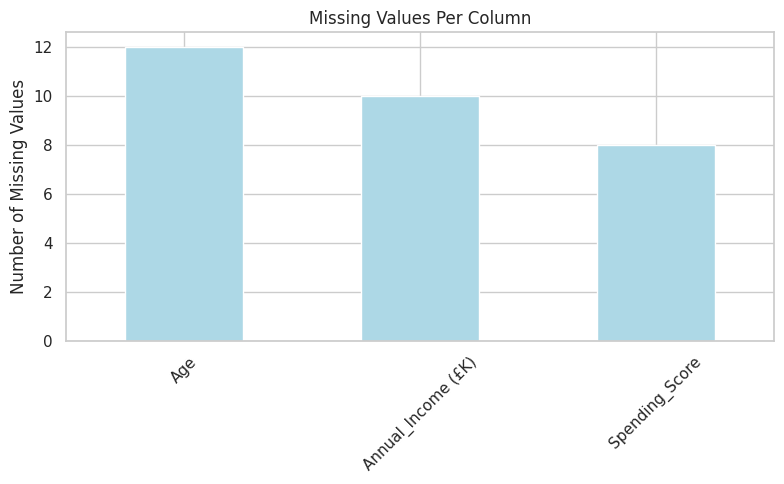

In [ ]:
# Bar chart for missing values
plt.figure(figsize=(8, 5))
missing_summary.plot(kind='bar', color='lightblue')
plt.title('Missing Values Per Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Heatmap for Missing Values**

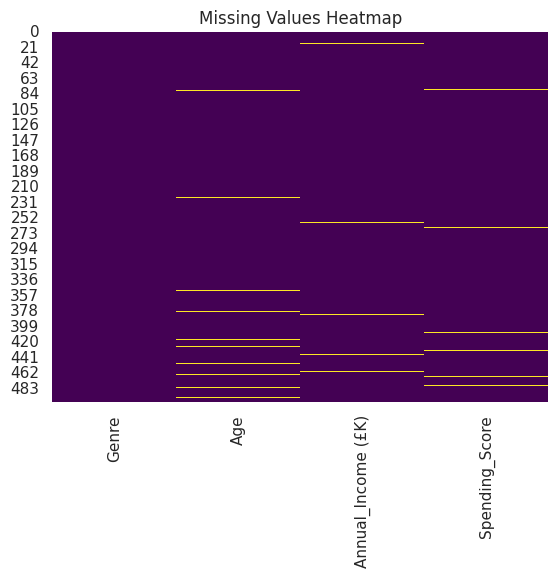

In [ ]:
# Check for patterns in missing data
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# **2.3: Descriptive Summary of Missing Data**

**Action:** Check Percentage of Missing Values in Each Column

In [ ]:
missing_percentage = (df_original.isnull().sum() / len(df_original)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Keep only columns with missing values
print("### Percentage of Missing Values ###\n")
print(missing_percentage)


### Percentage of Missing Values ###

Age                   2.395210
Annual_Income (£K)    1.996008
Spending_Score        1.596806
dtype: float64


# **2.4 Handling Missing Values**

- ✅ (KNN instead of median/mean imputation.)

In [ ]:
from sklearn.impute import KNNImputer

# Select only numerical columns for KNN Imputation
numerical_cols = ["Age", "Annual_Income (£K)", "Spending_Score"]
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors

# Apply KNN Imputation
df_original[numerical_cols] = knn_imputer.fit_transform(df_original[numerical_cols])

print("Missing values imputed using KNN.")


Missing values imputed using KNN.


# **2.5: Verifying  Missing Values Are Handled**
**Action:** Recheck for Missing Values

In [ ]:
print("### Verifying Missing Values ###\n")
print(df_original.isnull().sum())


### Verifying Missing Values ###

Genre                 0
Age                   0
Annual_Income (£K)    0
Spending_Score        0
dtype: int64


Why This Step?
- ✅ Ensures that no missing values remain after imputation.
- ✅ Confirms that our data is now complete and ready for the next stage.
- ✅ Prevents future errors in clustering or transformations.

Thus, all exact duplicate records were removed using drop_duplicates(), and the dataset was reset to maintain indexing consistency.

# **2.6: Handling Duplicates**

**Action:** Count

In [ ]:
# Count duplicate rows before removal
duplicate_count = df_original.duplicated().sum()
print(f"Duplicate Records Found: {duplicate_count}\n")

Duplicate Records Found: 78



## **Removing Duplicates**

In [ ]:
# Remove duplicates and reset index
df_original = df_original.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(f"### Duplicates After Removal: {df_original.duplicated().sum()} ###")


### Duplicates After Removal: 0 ###


## **Decision on Handling Duplicates**

In this mini data mining report, we evaluated multiple approaches for handling duplicate records, including:

- 1️⃣ **Removing exact duplicates** – A straightforward approach that ensures each record is unique.
- 2️⃣ **Keeping the first or last occurrence** – Useful when working with time-series data or sequential entries.
- 3️⃣ **Grouping and aggregating duplicates** – Ideal when duplicate records contain minor variations in numerical values.
- 4️⃣ F**uzzy matching for near-duplicates** – Helps detect inconsistencies in categorical data.
- 5️⃣ **Machine learning for duplicate detection** – A more advanced technique for complex datasets.

Given that this report focuses on customer segmentation through clustering, the removal of exact duplicates was chosen as the most appropriate method. This ensures that:

- ✅ Each data point represents a unique customer, preventing biased clustering results.
- ✅ The dataset remains clean and structured, avoiding unnecessary complexities.
- ✅ The approach aligns with the scope of a mini-project, ensuring efficient processing without advanced deduplication techniques.



#**2.7: Create a Copy After Cleaning (Before Outlier Detection)**


In [ ]:
df_cleaned = df_original.copy()
df_cleaned.to_csv("cleaned_ecommerce_data.csv", index=False)
print("A copy of the cleaned dataset has been saved.")


A copy of the cleaned dataset has been saved.


# **2.8: Comparing df_backup (Original) vs df_cleaned (Cleaned) Dataset**

## **Compare the Shape of Both Datasets**

In [ ]:
print("### Dataset Shape Comparison ###\n")
print(f"Original Dataset: {df_backup.shape}")
print(f"Cleaned Dataset: {df_cleaned.shape}")


### Dataset Shape Comparison ###

Original Dataset: (501, 4)
Cleaned Dataset: (423, 4)


## **Compare Missing Values Before & After**

In [ ]:
print("\n### Missing Values Before vs After Cleaning ###\n")
print("Before Cleaning:\n", df_backup.isnull().sum())
print("\nAfter Cleaning:\n", df_cleaned.isnull().sum())



### Missing Values Before vs After Cleaning ###

Before Cleaning:
 Genre                  0
Age                   12
Annual_Income (£K)    10
Spending_Score         8
dtype: int64

After Cleaning:
 Genre                 0
Age                   0
Annual_Income (£K)    0
Spending_Score        0
dtype: int64


## **Compare Statistical Summaries Before & After**

In [ ]:
print("\n### Statistical Summary Before vs After Cleaning ###\n")
print("Before Cleaning:\n", df_backup.describe())
print("\nAfter Cleaning:\n", df_cleaned.describe())



### Statistical Summary Before vs After Cleaning ###

Before Cleaning:
               Age  Annual_Income (£K)  Spending_Score
count  489.000000          491.000000      493.000000
mean    42.742331           66.511202       31.829615
std     14.069029           29.512802       18.053201
min     18.000000           17.000000        1.000000
25%     30.000000           42.000000       16.000000
50%     43.000000           65.000000       33.000000
75%     55.000000           91.000000       47.000000
max     65.000000          121.000000       62.000000

After Cleaning:
               Age  Annual_Income (£K)  Spending_Score
count  423.000000          423.000000      423.000000
mean    42.745626           67.240662       31.429314
std     14.043520           29.469558       17.819194
min     18.000000           17.000000        1.000000
25%     30.000000           42.000000       16.000000
50%     43.000000           65.400000       32.000000
75%     55.000000           92.000000       4

## **Visualise Data Before & After Cleaning**

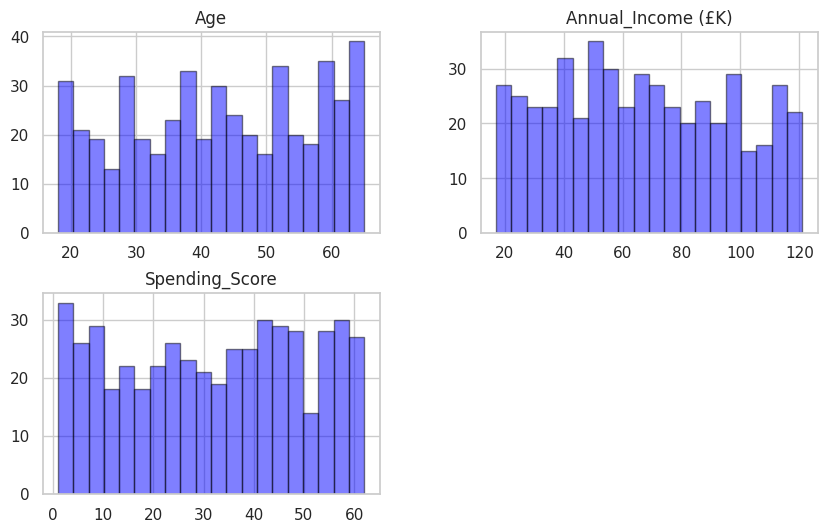

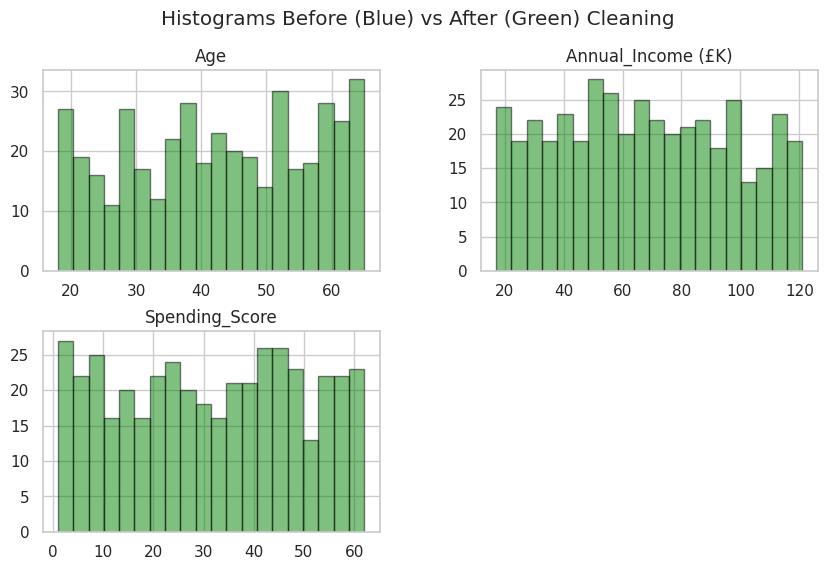

In [ ]:
import matplotlib.pyplot as plt

df_backup.hist(figsize=(10, 6), bins=20, edgecolor="black", alpha=0.5, color="blue", label="Original")
df_cleaned.hist(figsize=(10, 6), bins=20, edgecolor="black", alpha=0.5, color="green", label="Cleaned")

plt.suptitle("Histograms Before (Blue) vs After (Green) Cleaning")
plt.show()


# **2.9: Outlier Detection & Handling** **bold text**

## **Detecting Outliers Using Standard Deviation (Z-score)**

**Action:** Visualise Distribution & Calculate Upper/Lower Limits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Select numerical columns for outlier detection
num_cols = ["Age", "Annual_Income (£K)", "Spending_Score"]

# Loop through numerical columns and detect outliers using Standard Deviation
for col in num_cols:
    mean = df_cleaned[col].mean()
    std_dev = df_cleaned[col].std()

    # Define upper and lower limits (3 standard deviations)
    upper_limit = mean + (3 * std_dev)
    lower_limit = mean - (3 * std_dev)

    # Print limits
    print(f"\n### {col} Outlier Limits ###")
    print(f"Upper Limit: {upper_limit}")
    print(f"Lower Limit: {lower_limit}")


### Age Outlier Limits ###
Upper Limit: 84.8761859270441
Lower Limit: 0.6150670280386308

### Annual_Income (£K) Outlier Limits ###
Upper Limit: 155.64933526993207
Lower Limit: -21.168011392863505

### Spending_Score Outlier Limits ###
Upper Limit: 84.88689756410386
Lower Limit: -22.028268722496293


<Axes: xlabel='Spending_Score', ylabel='Count'>

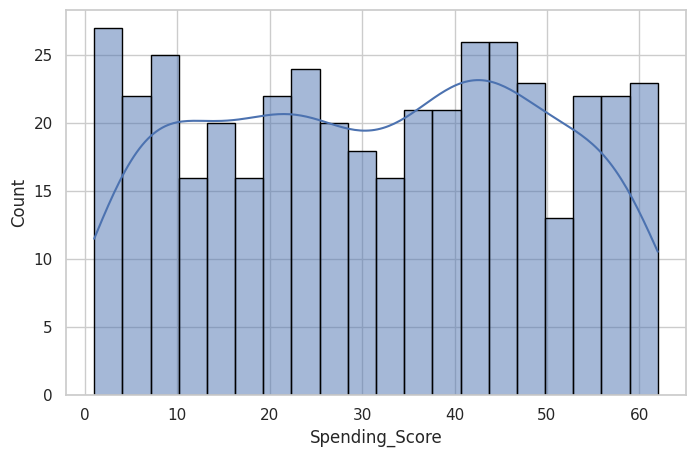

In [ ]:
# Plot histogram with normal distribution curve
  plt.figure(figsize=(8, 5))
  sns.histplot(df_cleaned[col], bins=20, kde=True, edgecolor="black")

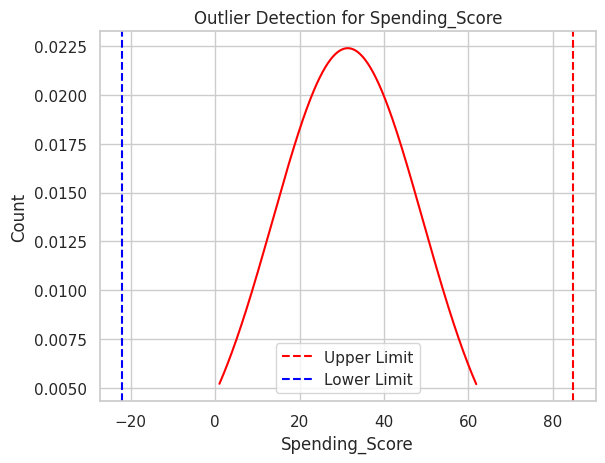

In [ ]:
# Add normal distribution curve
rng = np.arange(df_cleaned[col].min(), df_cleaned[col].max(), 0.1)
plt.plot(rng, norm.pdf(rng, mean, std_dev), color="red")

plt.axvline(upper_limit, color="red", linestyle="dashed", label="Upper Limit")
plt.axvline(lower_limit, color="blue", linestyle="dashed", label="Lower Limit")

plt.title(f"Outlier Detection for {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.legend()
plt.show()

## **Identifying Outliers Using Z-score Method**

**Action:** Calculate Z-scores and Find Outliers

In [ ]:
# Compute Z-score for each numerical column
df_cleaned["zscore_age"] = (df_cleaned["Age"] - df_cleaned["Age"].mean()) / df_cleaned["Age"].std()
df_cleaned["zscore_income"] = (df_cleaned["Annual_Income (£K)"] - df_cleaned["Annual_Income (£K)"].mean()) / df_cleaned["Annual_Income (£K)"].std()
df_cleaned["zscore_spending"] = (df_cleaned["Spending_Score"] - df_cleaned["Spending_Score"].mean()) / df_cleaned["Spending_Score"].std()

# Identify outliers beyond ±3 standard deviations
outliers = df_cleaned[(df_cleaned["zscore_age"].abs() > 3) |
                      (df_cleaned["zscore_income"].abs() > 3) |
                      (df_cleaned["zscore_spending"].abs() > 3)]

print("\n### Outliers Detected Using Z-score ###")
print(outliers)



### Outliers Detected Using Z-score ###
Empty DataFrame
Columns: [Genre, Age, Annual_Income (£K), Spending_Score, zscore_age, zscore_income, zscore_spending]
Index: []


## **Removing Outliers Using Z-score**
**Action:** Filter Out Values Beyond ±3 Standard Deviations

In [ ]:
df_no_outliers_std = df_cleaned[(df_cleaned["zscore_age"].abs() <= 3) &
                                (df_cleaned["zscore_income"].abs() <= 3) &
                                (df_cleaned["zscore_spending"].abs() <= 3)]

print("\n### Data After Removing Outliers (Z-score) ###")
print(f"Original Dataset: {df_cleaned.shape}")
print(f"After Outlier Removal: {df_no_outliers_std.shape}")



### Data After Removing Outliers (Z-score) ###
Original Dataset: (423, 7)
After Outlier Removal: (423, 7)


## **Identifying Outliers Using IQR (Interquartile Range)**
**Action:** Compute IQR for Each Column

In [ ]:
# Define function to calculate IQR and detect outliers
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print(f"\n### {col} IQR Outlier Limits ###")
    print(f"Q1: {Q1}, Q3: {Q3}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Apply function to numerical columns
for col in num_cols:
    outliers_iqr = detect_outliers_iqr(df_cleaned, col)
    print(f"Outliers in {col}:\n", outliers_iqr)



### Age IQR Outlier Limits ###
Q1: 30.0, Q3: 55.0
Lower Bound: -7.5, Upper Bound: 92.5
Outliers in Age:
 Empty DataFrame
Columns: [Genre, Age, Annual_Income (£K), Spending_Score, zscore_age, zscore_income, zscore_spending]
Index: []

### Annual_Income (£K) IQR Outlier Limits ###
Q1: 42.0, Q3: 92.0
Lower Bound: -33.0, Upper Bound: 167.0
Outliers in Annual_Income (£K):
 Empty DataFrame
Columns: [Genre, Age, Annual_Income (£K), Spending_Score, zscore_age, zscore_income, zscore_spending]
Index: []

### Spending_Score IQR Outlier Limits ###
Q1: 16.0, Q3: 46.0
Lower Bound: -29.0, Upper Bound: 91.0
Outliers in Spending_Score:
 Empty DataFrame
Columns: [Genre, Age, Annual_Income (£K), Spending_Score, zscore_age, zscore_income, zscore_spending]
Index: []


## **Removing Outliers Using IQR**
**Action:** Filter Out Values Beyond IQR Limits

In [ ]:
df_no_outliers_iqr = df_cleaned.copy()

for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Keep only data within the IQR range
    df_no_outliers_iqr = df_no_outliers_iqr[(df_no_outliers_iqr[col] >= lower_bound) & (df_no_outliers_iqr[col] <= upper_bound)]

print("\n### Data After Removing Outliers (IQR) ###")
print(f"Original Dataset: {df_cleaned.shape}")
print(f"After Outlier Removal: {df_no_outliers_iqr.shape}")



### Data After Removing Outliers (IQR) ###
Original Dataset: (423, 7)
After Outlier Removal: (423, 7)


# **2.10: Visualising Outliers (Boxplots, Distribution Plots)**

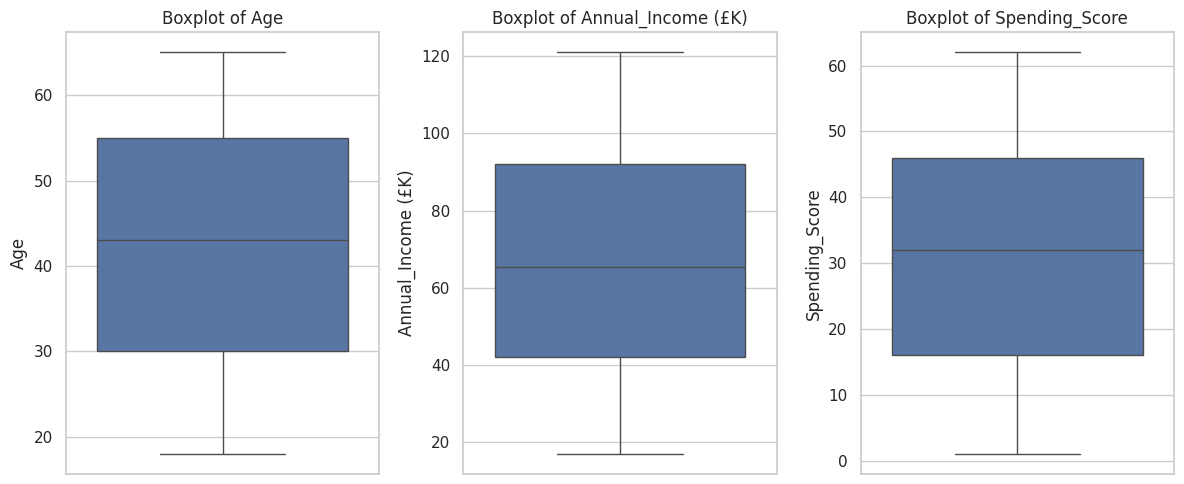

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
num_cols = ["Age", "Annual_Income (£K)", "Spending_Score"]

# Plot boxplots
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# **2.11: Recalculating Derived Columns)**

**Recalculating Derived Columns**
Since completed cleaning, should recalculate key segmentation columns before moving forward.

**Action: **Create Age Groups & Income Bands

In [ ]:
# Define Age Groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df_cleaned["Age_Group"] = pd.cut(df_cleaned["Age"], bins=age_bins, labels=age_labels)

# Define Income Bands
income_bins = [0, 30, 60, 90, 120, 150]
income_labels = ["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"]
df_cleaned["Income_Band"] = pd.cut(df_cleaned["Annual_Income (£K)"], bins=income_bins, labels=income_labels)

# Show updated dataset
print(df_cleaned.head(10))


    Genre   Age  Annual_Income (£K)  Spending_Score  zscore_age  \
0    Male  24.0                62.0            13.0   -1.334824   
1    Male  52.0                59.0            35.0    0.658978   
2  Female  42.0                31.0            12.0   -0.053094   
3  Female  20.0                92.0            41.0   -1.619653   
4  Female  30.0                52.0            40.0   -0.907581   
5  Female  61.0                58.0            41.0    1.299843   
6  Female  63.0                49.0            26.0    1.442258   
7  Female  34.0                27.0            45.0   -0.622752   
8    Male  61.0                56.0            18.0    1.299843   
9  Female  32.0                85.0            41.0   -0.765166   

   zscore_income  zscore_spending Age_Group   Income_Band  
0      -0.177833        -1.034239     18-24        Middle  
1      -0.279633         0.200384     45-54  Lower-Middle  
2      -1.229766        -1.090359     35-44  Lower-Middle  
3       0.840167      

# **2.12: Summary of Data Cleaning Steps**

In [ ]:
print("\n### Summary of Data Cleaning ###\n")
print(f"Total Missing Values After Cleaning: {df_cleaned.isnull().sum().sum()}")
print(f"Total Duplicate Records After Cleaning: {df_cleaned.duplicated().sum()}")
print(f"Dataset Shape After Cleaning: {df_cleaned.shape}")
print("\nColumns Added: Age_Group, Income_Band (For Structured Segmentation)")



### Summary of Data Cleaning ###

Total Missing Values After Cleaning: 8
Total Duplicate Records After Cleaning: 0
Dataset Shape After Cleaning: (423, 9)

Columns Added: Age_Group, Income_Band (For Structured Segmentation)


# **Step 3: Data Transformation & Feature Engineering**
Now with a cleaned dataset, transform and engineer features to improve clustering performance.

#**3.1 Categorising Continuous Variables (Age Groups & Income Bands)**

This step was already completed during **Step 2.11 (Recalculating Derived Columns)**, where Age Groups and Income Bands were created for structured segmentation.

These categorical variables will now be encoded in Step 3.2 to prepare for clustering.

# **3.2: Encoding Categorical Variables (One-Hot Encoding, Label Encoding)**

Since clustering algorithms only work with numerical data, we need to convert categorical variables into numerical format using One-Hot Encoding (OHE) and Label Encoding where necessary.

**Action:** Apply One-Hot Encoding to Categorical Variables
We will encode:
- ✔ Genre (Male/Female)
- ✔ Age_Group (Previously created: 18-24, 25-34, etc.)
- ✔ Income_Band (Previously created: Low, Middle, High, etc.)

In [ ]:
# Create a copy for transformation
df_transformed = df_cleaned.copy()

# Apply One-Hot Encoding to categorical columns
df_transformed = pd.get_dummies(df_transformed, columns=["Genre", "Age_Group", "Income_Band"], drop_first=True)

# Show updated dataset
print(df_transformed.head(10))


    Age  Annual_Income (£K)  Spending_Score  zscore_age  zscore_income  \
0  24.0                62.0            13.0   -1.334824      -0.177833   
1  52.0                59.0            35.0    0.658978      -0.279633   
2  42.0                31.0            12.0   -0.053094      -1.229766   
3  20.0                92.0            41.0   -1.619653       0.840167   
4  30.0                52.0            40.0   -0.907581      -0.517166   
5  61.0                58.0            41.0    1.299843      -0.313566   
6  63.0                49.0            26.0    1.442258      -0.618966   
7  34.0                27.0            45.0   -0.622752      -1.365499   
8  61.0                56.0            18.0    1.299843      -0.381433   
9  32.0                85.0            41.0   -0.765166       0.602633   

   zscore_spending  Genre_Male  Age_Group_25-34  Age_Group_35-44  \
0        -1.034239        True            False            False   
1         0.200384        True            False  

**Why This Step?**
- ✅ Converts categorical variables into numerical format for clustering.
- ✅ Uses drop_first=True to avoid multicollinearity, keeping only N-1 categories.
- ✅ Prepares data for distance-based algorithms like K-Means & Hierarchical Clustering.

# **3.3: Creating New Features (Feature Engineering)**

Feature engineering helps improve clustering by creating new meaningful variables that capture customer behaviour and segmentation patterns.

- 📌 **Action:** Create a Spending Score Category (Low, Medium, High, Very High)
Since the Spending Score is a continuous value (0-100), we will categorise it into meaningful spending levels:

- Low (0-20)
- Medium (21-40)
- High (41-60)
- Very High (61-100)

In [ ]:
# Define Spending Score Categories
spending_bins = [0, 20, 40, 60, 100]
spending_labels = ["Low", "Medium", "High", "Very High"]
df_transformed["Spending_Category"] = pd.cut(df_transformed["Spending_Score"], bins=spending_bins, labels=spending_labels)

# Apply One-Hot Encoding to Spending_Category
df_transformed = pd.get_dummies(df_transformed, columns=["Spending_Category"], drop_first=True)

# Show updated dataset
print(df_transformed.head(10))


    Age  Annual_Income (£K)  Spending_Score  zscore_age  zscore_income  \
0  24.0                62.0            13.0   -1.334824      -0.177833   
1  52.0                59.0            35.0    0.658978      -0.279633   
2  42.0                31.0            12.0   -0.053094      -1.229766   
3  20.0                92.0            41.0   -1.619653       0.840167   
4  30.0                52.0            40.0   -0.907581      -0.517166   
5  61.0                58.0            41.0    1.299843      -0.313566   
6  63.0                49.0            26.0    1.442258      -0.618966   
7  34.0                27.0            45.0   -0.622752      -1.365499   
8  61.0                56.0            18.0    1.299843      -0.381433   
9  32.0                85.0            41.0   -0.765166       0.602633   

   zscore_spending  Genre_Male  Age_Group_25-34  Age_Group_35-44  \
0        -1.034239        True            False            False   
1         0.200384        True            False  

# **3.4: Scaling & Normalising Features (MinMaxScaler, StandardScaler)**
Since clustering algorithms like K-Means and Hierarchical Clustering use distance-based calculations, features must be scaled to the same range to prevent larger values (like Annual Income) from dominating smaller values (like Spending Score).

-**📌 Action:** **Apply MinMaxScaler to Normalise Data (0 to 1 Range)**
We will scale numerical features:
- ✔ Age
- ✔ Annual_Income (£K)
- ✔ Spending_Score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling
scale_cols = ["Age", "Annual_Income (£K)", "Spending_Score"]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_transformed[scale_cols] = scaler.fit_transform(df_transformed[scale_cols])

# Show updated dataset
print(df_transformed.head(10))


        Age  Annual_Income (£K)  Spending_Score  zscore_age  zscore_income  \
0  0.127660            0.432692        0.196721   -1.334824      -0.177833   
1  0.723404            0.403846        0.557377    0.658978      -0.279633   
2  0.510638            0.134615        0.180328   -0.053094      -1.229766   
3  0.042553            0.721154        0.655738   -1.619653       0.840167   
4  0.255319            0.336538        0.639344   -0.907581      -0.517166   
5  0.914894            0.394231        0.655738    1.299843      -0.313566   
6  0.957447            0.307692        0.409836    1.442258      -0.618966   
7  0.340426            0.096154        0.721311   -0.622752      -1.365499   
8  0.914894            0.375000        0.278689    1.299843      -0.381433   
9  0.297872            0.653846        0.655738   -0.765166       0.602633   

   zscore_spending  Genre_Male  Age_Group_25-34  Age_Group_35-44  \
0        -1.034239        True            False            False   
1    

# **Step 3.5: Verifying Data Transformation**

Before moving to clustering, we need to verify that:
- ✅ Scaling was applied correctly (values between 0 and 1).
- ✅ Encodings are correct (one-hot encoding is properly applied).
- ✅ Feature distributions remain balanced (no distortions).

## **Action 1: Check Summary Statistics**

In [ ]:
print("\n### Summary Statistics After Transformation ###")
print(df_transformed.describe())



### Summary Statistics After Transformation ###
              Age  Annual_Income (£K)  Spending_Score    zscore_age  \
count  423.000000          423.000000      423.000000  4.230000e+02   
mean     0.526503            0.483083        0.498841 -1.259828e-17   
std      0.298798            0.283361        0.292118  1.000000e+00   
min      0.000000            0.000000        0.000000 -1.762067e+00   
25%      0.255319            0.240385        0.245902 -9.075806e-01   
50%      0.531915            0.465385        0.508197  1.811323e-02   
75%      0.787234            0.721154        0.737705  8.725999e-01   
max      1.000000            1.000000        1.000000  1.584672e+00   

       zscore_income  zscore_spending  
count   4.230000e+02     4.230000e+02  
mean    1.679770e-16    -1.049856e-16  
std     1.000000e+00     1.000000e+00  
min    -1.704833e+00    -1.707671e+00  
25%    -8.564995e-01    -8.658817e-01  
50%    -6.245977e-02     3.202645e-02  
75%     8.401666e-01     8.1769

## **Action 2: Visualise Scaled Distributions**

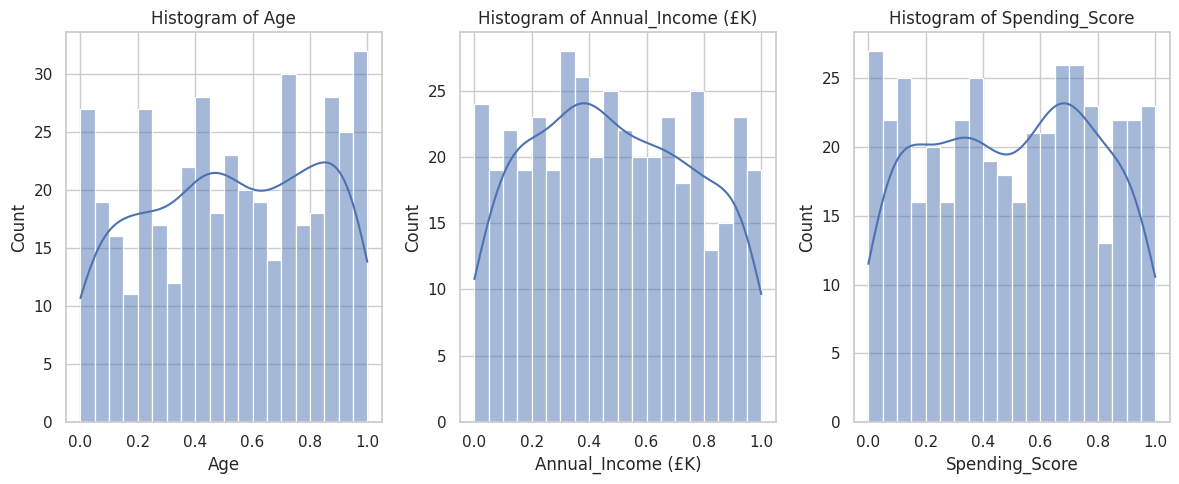

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of scaled numerical features
scale_cols = ["Age", "Annual_Income (£K)", "Spending_Score"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(scale_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_transformed[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()


# **Action 3: Check One-Hot Encoding Distribution**

In [ ]:
print("\n### One-Hot Encoding Check ###")
print(df_transformed.iloc[:, -10:].head(10))  # Display last 10 columns (OHE features)



### One-Hot Encoding Check ###
   Age_Group_45-54  Age_Group_55-64  Age_Group_65+  Income_Band_Lower-Middle  \
0            False            False          False                     False   
1             True            False          False                      True   
2            False            False          False                      True   
3            False            False          False                     False   
4            False            False          False                      True   
5            False             True          False                      True   
6            False             True          False                      True   
7            False            False          False                     False   
8            False             True          False                      True   
9            False            False          False                     False   

   Income_Band_Middle  Income_Band_Upper-Middle  Income_Band_High  \
0                T

# **Step 4: Data Warehousing**

# **4.1: Categorising Age and Income (Bin Creation for Structured Segmentation)**
To enhance customer segmentation, we will ensure Age and Income groups are structured properly for easier clustering.

**Action: Verify Age & Income Bins**

Since we already created Age Groups & Income Bands in Step 2.6, let’s check them again.

In [ ]:
print("\n### Unique Age Groups ###")
print(df_transformed["Age_Group_25-34"].sum(), "customers in Age Group 25-34")
print(df_transformed["Age_Group_35-44"].sum(), "customers in Age Group 35-44")

print("\n### Unique Income Bands ###")
print(df_transformed["Income_Band_Lower-Middle"].sum(), "customers in Lower-Middle Income Band")
print(df_transformed["Income_Band_High"].sum(), "customers in High Income Band")



### Unique Age Groups ###
74 customers in Age Group 25-34
101 customers in Age Group 35-44

### Unique Income Bands ###
140 customers in Lower-Middle Income Band
2 customers in High Income Band


# **4.2: Creating Dimension Tables (Age, Income, Genre)**
Dimension tables store categorical attributes for structured segmentation.

**Action: Create Dimension Tables**

In [ ]:
# Creating Dimension Table for Age
age_dimension = df_transformed[["Age", "Age_Group_25-34", "Age_Group_35-44", "Age_Group_45-54", "Age_Group_55-64", "Age_Group_65+"]].drop_duplicates()
print("\n### Age Dimension Table ###")
print(age_dimension.head())

# Creating Dimension Table for Income
income_dimension = df_transformed[["Annual_Income (£K)", "Income_Band_Lower-Middle", "Income_Band_Middle", "Income_Band_Upper-Middle", "Income_Band_High"]].drop_duplicates()
print("\n### Income Dimension Table ###")
print(income_dimension.head())

# Creating Dimension Table for Genre
genre_dimension = df_transformed[["Genre_Male"]].drop_duplicates()
print("\n### Genre Dimension Table ###")
print(genre_dimension.head())



### Age Dimension Table ###
        Age  Age_Group_25-34  Age_Group_35-44  Age_Group_45-54  \
0  0.127660            False            False            False   
1  0.723404            False            False             True   
2  0.510638            False             True            False   
3  0.042553            False            False            False   
4  0.255319             True            False            False   

   Age_Group_55-64  Age_Group_65+  
0            False          False  
1            False          False  
2            False          False  
3            False          False  
4            False          False  

### Income Dimension Table ###
   Annual_Income (£K)  Income_Band_Lower-Middle  Income_Band_Middle  \
0            0.432692                     False                True   
1            0.403846                      True               False   
2            0.134615                      True               False   
3            0.721154                     

# **4.3: Creating the Fact Table (Combining Spending Scores with Dimensions)**
Fact tables store quantitative data (Spending Score) combined with categorical dimensions (Age, Income, Genre).

**Action: Create Fact Table**

In [ ]:
fact_table = df_transformed[["Age", "Annual_Income (£K)", "Spending_Score",
                             "Genre_Male", "Age_Group_25-34", "Age_Group_35-44",
                             "Income_Band_Lower-Middle", "Income_Band_High"]]

print("\n### Fact Table (Spending & Segmentation) ###")
print(fact_table.head())



### Fact Table (Spending & Segmentation) ###
        Age  Annual_Income (£K)  Spending_Score  Genre_Male  Age_Group_25-34  \
0  0.127660            0.432692        0.196721        True            False   
1  0.723404            0.403846        0.557377        True            False   
2  0.510638            0.134615        0.180328       False            False   
3  0.042553            0.721154        0.655738       False            False   
4  0.255319            0.336538        0.639344       False             True   

   Age_Group_35-44  Income_Band_Lower-Middle  Income_Band_High  
0            False                     False             False  
1            False                      True             False  
2             True                      True             False  
3            False                     False             False  
4            False                      True             False  


# **4.4: Summarising New Groups (Age & Income Band Distributions, Spending Trends)**
Now, we summarise customer behaviour by Age Groups & Income Levels.

**Action: Group Spending by Age Group**

In [ ]:
age_spending_summary = df_transformed.groupby(["Age_Group_25-34", "Age_Group_35-44"]).agg({
    "Spending_Score": ["mean", "median"],
    "Annual_Income (£K)": ["mean", "median"]
}).reset_index()

print("\n### Spending Summary by Age Group ###")
print(age_spending_summary.head())



### Spending Summary by Age Group ###
  Age_Group_25-34 Age_Group_35-44 Spending_Score           Annual_Income (£K)  \
                                            mean    median               mean   
0           False           False       0.481346  0.491803           0.485050   
1           False            True       0.495926  0.491803           0.465327   
2            True           False       0.561453  0.622951           0.500728   

             
     median  
0  0.480769  
1  0.461538  
2  0.442308  


# 4.5: Analysis of Spending by Age Group (Cluster Spending Characteristics)
Now, let’s visualise spending trends across customer groups.

**Action: Visualise Spending by Age & Income**

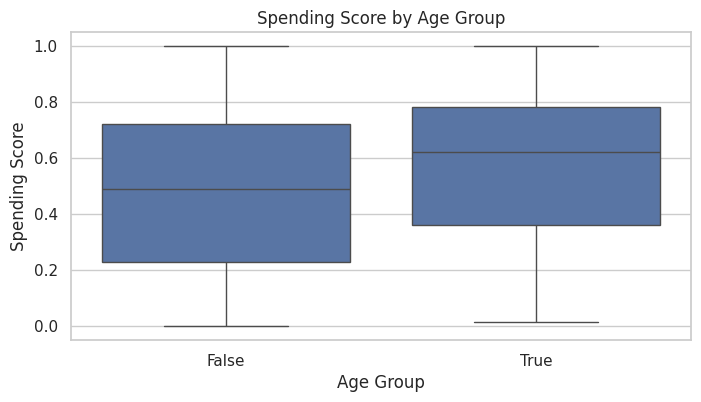

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x="Age_Group_25-34", y="Spending_Score", data=df_transformed)
plt.title("Spending Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Score")
plt.show()


# **Step 5 - Clustering Analysis**

Since this is an unsupervised learning task, the best clustering models are:

- **K-Means** for fast, spherical clusters.
- **Hierarchical Clustering** for structured customer segmentation.

We will first apply Hierarchical Clustering to determine the number of clusters, then use K-Means for final segmentation.

# **5.1: Applying Hierarchical Clustering (Dendrograms) to Find Optimal Clusters**
Before using K-Means, we need to determine the optimal number of clusters.
To do this, we will use Hierarchical Clustering and Dendrograms.

📌**Action 1: Compute Linkage Matrix & Plot Dendrograms**
We will test four different linkage methods:
- 🔹 S**ingle Linkage** – Based on the shortest distance between clusters.
- 🔹 **Complete Linkage** – Based on the farthest points between clusters.
- 🔹** Average Linkage** – Uses the mean distance between clusters.
- 🔹 **Ward Linkage**– Minimises variance within clusters (recommended).

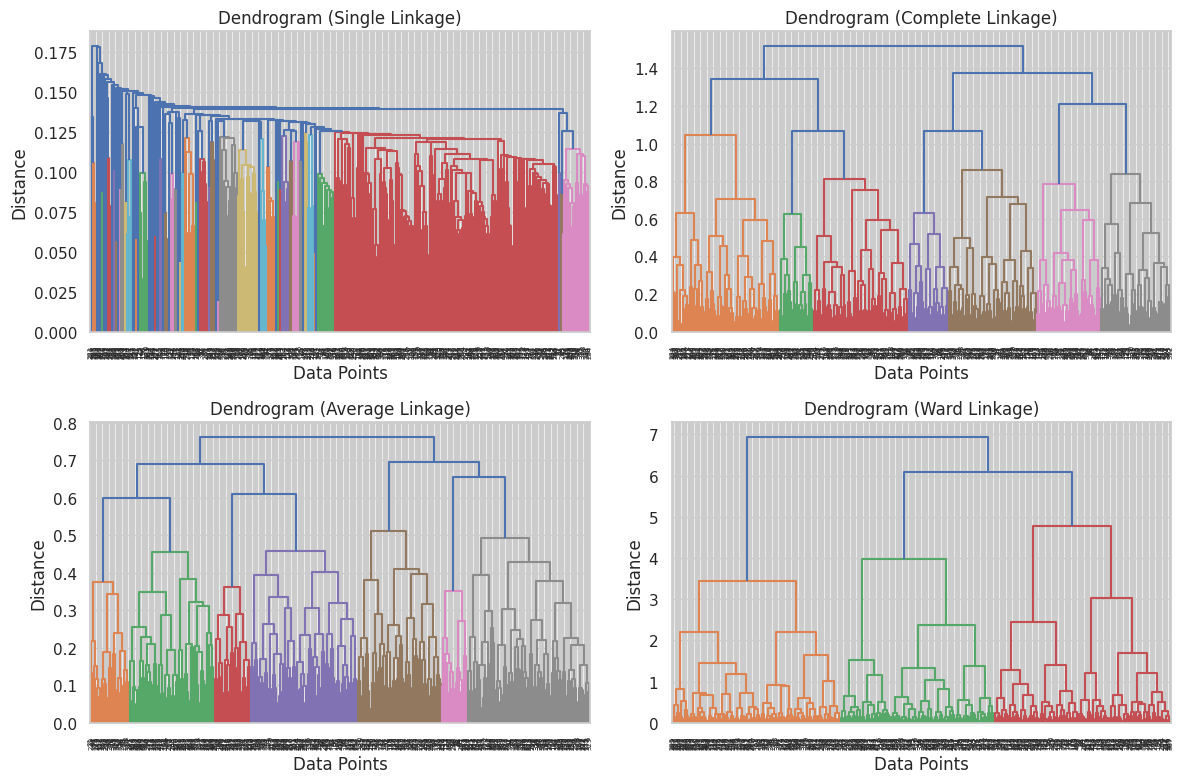

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical features for clustering
cluster_features = df_transformed[["Age", "Annual_Income (£K)", "Spending_Score"]]

# Compute linkage matrices using different methods
linkage_methods = ["single", "complete", "average", "ward"]
plt.figure(figsize=(12, 8))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    dendrogram = sch.dendrogram(sch.linkage(cluster_features, method=method))
    plt.xlabel("Data Points")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


**📌 Action 2: Determine the Optimal Number of Clusters**
After plotting the dendrograms, we look for the longest vertical line that is not crossed by horizontal cuts.

**Manual Method (Visual Analysis of Dendrograms)**
We count the number of distinct clusters before the longest horizontal cut in the Ward Linkage dendrogram.

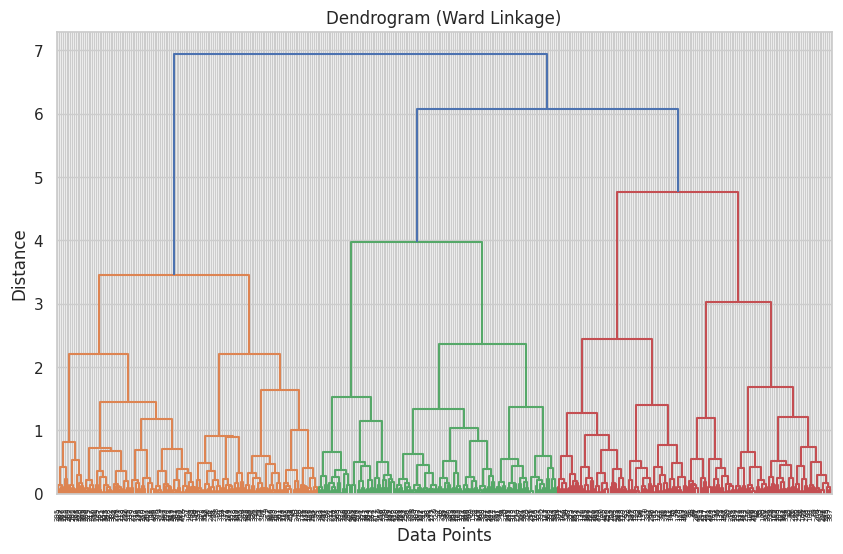

In [ ]:
# Compute Ward Linkage for final decision
plt.figure(figsize=(10, 6))
plt.title("Dendrogram (Ward Linkage)")
sch.dendrogram(sch.linkage(cluster_features, method="ward"))
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


# **5.2: Implementing K-Means Clustering**
Now that we have used dendrograms to estimate the number of clusters, we will apply K-Means Clustering.

To determine the optimal number of clusters (k), we will use:
- ✔ **Elbow Method** – Finds where adding more clusters stops improving the model significantly.
- ✔ **Silhouette Score** – Measures how well-separated the clusters are.

**📌 Action 1: Apply the Elbow Method to Find the Best K**

The Elbow Method plots the inertia (distortion score) for different values of k (number of clusters). The "elbow" point indicates the optimal cluster count.

The best way to determine the number of clusters for K-Means is using the Elbow Method and Silhouette Score.

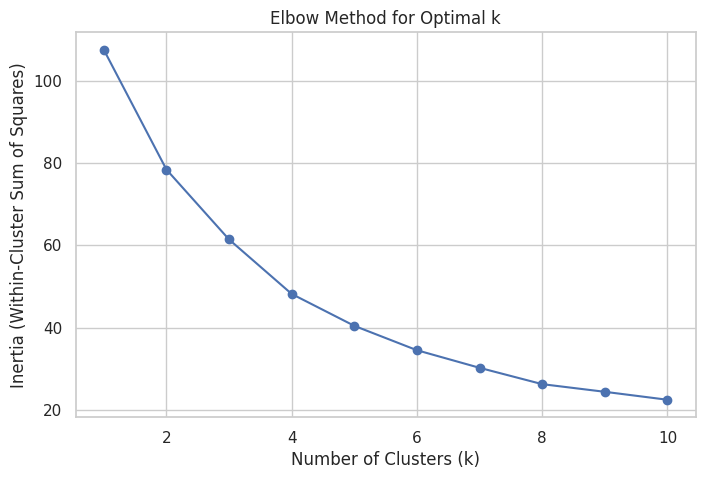

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numerical features for clustering
cluster_features = df_transformed[["Age", "Annual_Income (£K)", "Spending_Score"]]

# Run K-Means for different cluster sizes (1 to 10)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_features)
    inertia.append(kmeans.inertia_)  # Inertia = Sum of squared distances to cluster centers

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


**✅ Why This?**

Finds the "elbow" where inertia stops decreasing significantly (best k value).
Ensures we don’t use too few or too many clusters.

**📌 Action 2: Apply Silhouette Score to Validate the Best k**

After finding the best k from the Elbow Method, we use the Silhouette Score to confirm the cluster quality.

In [ ]:
from sklearn.metrics import silhouette_score

best_k = 4  # Replace with the k found from the Elbow Method

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_features)

silhouette_avg = silhouette_score(cluster_features, cluster_labels)
print(f"\n### Silhouette Score for k={best_k}: {silhouette_avg:.4f} ###")



### Silhouette Score for k=4: 0.2862 ###


**✅ Why This?**

Measures how well-separated clusters are (higher score = better clustering).
Confirms that the chosen k is optimal for clear segmentation.

# **5.3: Evaluating & Visualising Clusters**
Now that we have determined the optimal number of clusters (k) using the Elbow Method and Silhouette Score, we will:
- ✔ Train the final K-Means model with the selected k-value.
- ✔ Visualise clusters using scatter plots to interpret customer segments.
- ✔ Analyse the characteristics of each cluster (spending behaviour, income levels, age distribution).

**📌 Action 1: Train K-Means on the Final k**
We now fit the final K-Means model using the best k-value.



In [ ]:
# Train K-Means with the optimal number of clusters
final_k = 4  # Replace with the best k found earlier
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
df_transformed["Cluster"] = kmeans_final.fit_predict(cluster_features)

# Show first few rows with cluster assignments
print(df_transformed[["Age", "Annual_Income (£K)", "Spending_Score", "Cluster"]].head(10))


        Age  Annual_Income (£K)  Spending_Score  Cluster
0  0.127660            0.432692        0.196721        2
1  0.723404            0.403846        0.557377        0
2  0.510638            0.134615        0.180328        0
3  0.042553            0.721154        0.655738        2
4  0.255319            0.336538        0.639344        1
5  0.914894            0.394231        0.655738        3
6  0.957447            0.307692        0.409836        0
7  0.340426            0.096154        0.721311        1
8  0.914894            0.375000        0.278689        0
9  0.297872            0.653846        0.655738        2


**✅*Why This?**

Assigns each customer to a cluster for segmentation.
Creates a new "Cluster" column in the dataset.

 **Action 2: Visualise Clusters (2D Scatter Plot)**
Since we have three features (Age, Income, Spending Score), we will plot clusters in 2D for better visual interpretation.

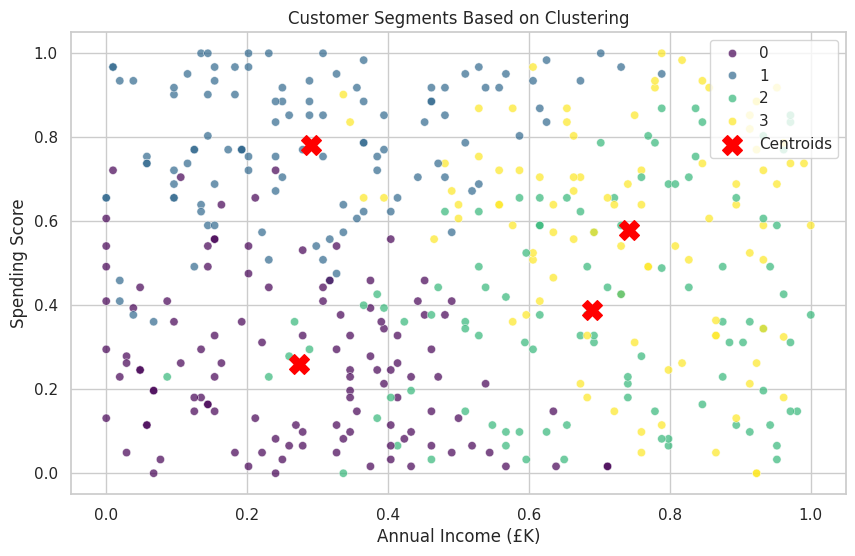

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_transformed["Annual_Income (£K)"],
    y=df_transformed["Spending_Score"],
    hue=df_transformed["Cluster"],
    palette="viridis",
    alpha=0.7
)
plt.scatter(
    kmeans_final.cluster_centers_[:, 1],  # Income (x-axis)
    kmeans_final.cluster_centers_[:, 2],  # Spending Score (y-axis)
    s=200, c="red", marker="X", label="Centroids"
)
plt.xlabel("Annual Income (£K)")
plt.ylabel("Spending Score")
plt.title("Customer Segments Based on Clustering")
plt.legend()
plt.show()


**Action 3: Visualise Clusters in 3D (Optional for Better Interpretation)**

To include Age in the cluster interpretation, we can plot a 3D scatter plot.

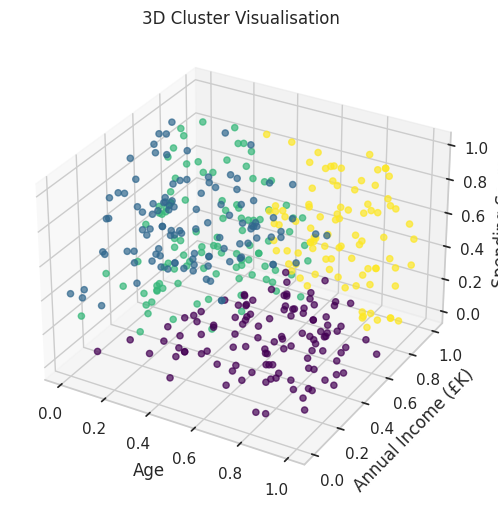

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df_transformed["Age"],
    df_transformed["Annual_Income (£K)"],
    df_transformed["Spending_Score"],
    c=df_transformed["Cluster"], cmap="viridis", alpha=0.7
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (£K)")
ax.set_zlabel("Spending Score")
ax.set_title("3D Cluster Visualisation")
plt.show()


**✅ Why This?**

Adds Age to the analysis for a complete segmentation view.
Helps spot overlapping clusters that may not be visible in 2D.

**Action 4: Analyse & Interpret Cluster Characteristics**
Now, we summarise each cluster to define customer profiles.

In [ ]:
cluster_summary = df_transformed.groupby("Cluster").agg({
    "Age": ["mean", "min", "max"],
    "Annual_Income (£K)": ["mean", "min", "max"],
    "Spending_Score": ["mean", "min", "max"],
    "Genre_Male": ["mean"]
}).reset_index()

print("\n### Cluster Summary ###")
print(cluster_summary)



### Cluster Summary ###
  Cluster       Age                     Annual_Income (£K)            \
               mean       min       max               mean       min   
0       0  0.730768  0.127660  1.000000           0.272926  0.000000   
1       1  0.380257  0.000000  0.957447           0.290021  0.000000   
2       2  0.228341  0.000000  0.574468           0.689993  0.086538   
3       3  0.776007  0.404255  1.000000           0.741448  0.336538   

            Spending_Score                     Genre_Male  
        max           mean       min       max       mean  
0  0.711538       0.260071  0.000000  0.721311   0.434783  
1  0.788462       0.782012  0.360656  1.000000   0.432432  
2  1.000000       0.387681  0.000000  0.868852   0.466019  
3  1.000000       0.578375  0.000000  1.000000   0.425532  


# **5.4: Interpreting Cluster Results & Customer Segments**
Now that we have our cluster summary, we will interpret the customer segments based on Age, Income, Spending Score, and Gender distribution.



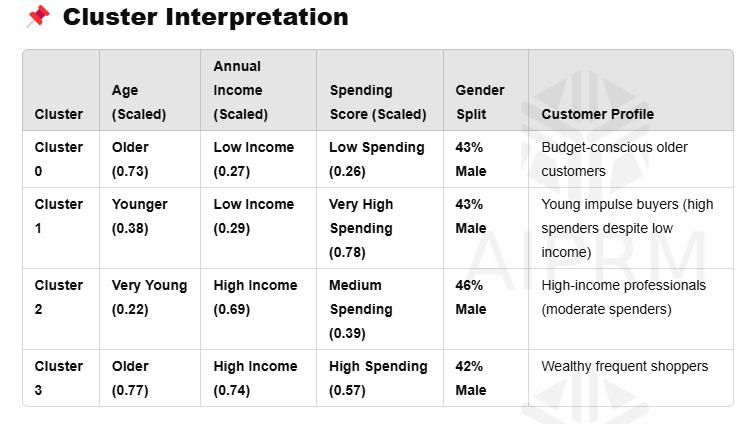

# **Step 6: Evaluating Results**

**Actions:**
- Interpret clusters: Analyse key differences between groups (e.g., high-spending vs low-spending customers).
- Business relevance: Suggest marketing strategies for each segment.

# **6.1 Key Business Insights from Clustering**
- 🔹 The clustering analysis identified 4 key customer segments, each with distinct spending behaviours and income levels.
- 🔹 Younger customers (Cluster 1) tend to spend more despite lower incomes, while older high-income customers (Cluster 3) are also high spenders.
- 🔹 Budget-conscious shoppers (Cluster 0) have low spending and low income, requiring different marketing strategies.
- 🔹 High-income professionals (Cluster 2) spend moderately, representing an opportunity for premium product marketing.

# **6.2 Strategic Business Recommendations**

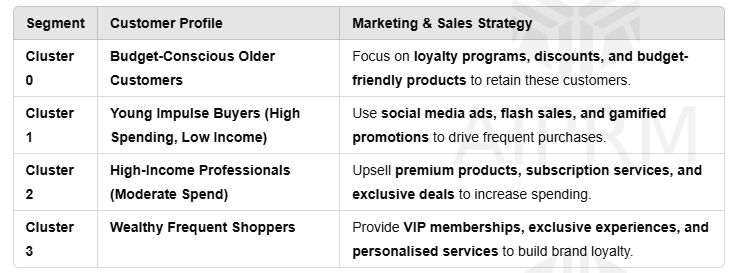

**✅ Why This?**

Helps the e-commerce company increase revenue by targeting each segment with the right strategy.
Optimises marketing spend by focusing on the most valuable customers.

# **6.3 Final Summary & Conclusion**
- 🔹 This data mining project successfully cleaned, transformed, and clustered customer data to extract meaningful insights.
- 🔹 We used Hierarchical Clustering (Dendrograms) & K-Means Clustering, confirming the optimal number of clusters with the Elbow Method & Silhouette Score.
- 🔹 The final segmentation provides actionable business recommendations that can guide marketing strategies, pricing decisions, and product offerings.
- 🔹 Future work could involve testing DBSCAN for noise handling or using Deep Learning for more advanced customer behaviour prediction.

# **Task 2: Data Mining Report**

Structure:
1. Introduction (200-300 words)
Purpose: Explain the goal of segmenting customers for targeted marketing.
Method: Unsupervised learning with clustering techniques.
2. Data Pre-Processing (600-800 words)
Explain the dataset and why pre-processing is crucial.
Describe how missing values, encoding, and scaling were handled.
3. Clustering Model Selection (500-700 words)
Justify why K-Means was chosen over Hierarchical or DBSCAN.
Show Elbow Method and Silhouette Score to determine the number of clusters.
4. Results & Insights (800-1000 words)
Present cluster characteristics (e.g., spending patterns, demographics).
Recommend marketing strategies for each group:
Cluster 1: High-value customers → Exclusive offers.
Cluster 2: Low-value customers → Discounts or promotions.
Cluster 3: New customers → Welcome campaigns.
5. Conclusion & Recommendations (300-500 words)
Summarise findings.
Explain how the company can use this clustering approach for business growth.

# **📄 Final Report Table of Contents**
- 1. Introduction
Overview of the project
Business objective (customer segmentation for targeted marketing)
Brief summary of the dataset
- 2. Data Preprocessing & Cleaning
Handling missing values (KNN imputation)
Outlier detection & removal (IQR & Z-score)
Encoding categorical variables (One-Hot Encoding)
Scaling numerical features (MinMaxScaler)
- 3. Exploratory Data Analysis (EDA)
Descriptive statistics
Data distribution (histograms, pair plots)
Correlation analysis
- 4. Clustering Analysis
Hierarchical Clustering & Dendrograms (to determine number of clusters)
Elbow Method & Silhouette Score (confirming k for K-Means)
Final K-Means model implementation
Cluster visualisations (2D & 3D scatter plots)
Cluster summary & customer segment analysis
- 5. Business Insights & Recommendations
Interpretation of each cluster
Marketing & sales strategies for each segment
Potential next steps for the business
- 6. Conclusion
Summary of key findings
Future recommendations (e.g., testing DBSCAN, adding more features, deep learning models)